In [87]:
import pandas as pd
import numpy as np
from datetime import datetime

###    #concat the 11 months of sales data into single csv file


In [88]:
import os

files = [file for file in os.listdir('sales analysis csv files')]

all_months_data = pd.DataFrame()

for file in files:
    #print(file)
    df = pd.read_csv('sales analysis csv files/' +file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.head()    

all_months_data.to_csv('all_sales_analysis_files.csv', index=False)
    

In [89]:
#date_parser = lambda x: datetime.strptime(x, '%m/%d/%y %H:%M' )
#all_data = pd.read_csv('all_sales_analysis_files.csv', parse_dates=['Order Date'], date_parser=date_parser)
all_data = pd.read_csv('all_sales_analysis_files.csv')
#all_data.drop(columns=['Unnamed: 0'], inplace=True) now this line isn't use bcz we specified index=False in .to_csv() func
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
161728,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
161729,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
161730,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
161731,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [90]:
all_data.shape

(161733, 6)

In [91]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## Question 1: what is the best mont for sales? How much we earned that month?

In [92]:
all_data.head()

#a lot of info is hidden in (Order Date) column just like as month, day, year, hour, min, sec    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [93]:
all_data.isnull().mean()*100      # we remove 0.287% data remove

Order ID            0.287511
Product             0.287511
Quantity Ordered    0.287511
Price Each          0.287511
Order Date          0.287511
Purchase Address    0.287511
dtype: float64

In [94]:
all_data.notnull().sum()

Order ID            161268
Product             161268
Quantity Ordered    161268
Price Each          161268
Order Date          161268
Purchase Address    161268
dtype: int64

In [95]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161733 entries, 0 to 161732
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          161268 non-null  object
 1   Product           161268 non-null  object
 2   Quantity Ordered  161268 non-null  object
 3   Price Each        161268 non-null  object
 4   Order Date        161268 non-null  object
 5   Purchase Address  161268 non-null  object
dtypes: object(6)
memory usage: 7.4+ MB


In [96]:
all_data = all_data.dropna()

In [97]:
all_data.shape

(161268, 6)

In [98]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### now start question 1

In [99]:
#from datetime import datetime
#convert object data type of Order Date col into datetime

all_data['Order Date'].value_counts()

#type(all_data.iloc[0,4])

Order Date
Order Date        307
04/02/19 13:24      7
10/30/19 21:28      7
09/27/19 18:51      6
09/15/19 23:41      6
                 ... 
07/06/19 12:15      1
07/08/19 23:17      1
07/17/19 17:03      1
07/08/19 17:26      1
09/30/19 00:18      1
Name: count, Length: 125091, dtype: int64

In [100]:
all_data[all_data['Order Date'].str[0:2] == 'Or']



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
160047,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
160434,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
161446,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
161515,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [101]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [102]:
#ll_data['Month'] = all_data['Order Date'].str[0:2]
#all_data['Month']= all_data['Month'].astype('int32')
#len(all_data)
#all_data

#from this cell of code i knew that in Order Date Or string exist


In [103]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160961 entries, 0 to 161732
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          160961 non-null  object
 1   Product           160961 non-null  object
 2   Quantity Ordered  160961 non-null  object
 3   Price Each        160961 non-null  object
 4   Order Date        160961 non-null  object
 5   Purchase Address  160961 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [104]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])  
# here specify the format, but in my case i don't need to specify format, bcz without specify the format my code is working
# but specify the format is the good way 
all_data.info()

C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\2847701516.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


<class 'pandas.core.frame.DataFrame'>
Index: 160961 entries, 0 to 161732
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          160961 non-null  object        
 1   Product           160961 non-null  object        
 2   Quantity Ordered  160961 non-null  object        
 3   Price Each        160961 non-null  object        
 4   Order Date        160961 non-null  datetime64[ns]
 5   Purchase Address  160961 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 8.6+ MB


In [105]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [106]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
156507,254344,AA Batteries (4-pack),1,3.84,2019-09-27 18:37:00,"705 Main St, Boston, MA 02215",9
81410,163207,Lightning Charging Cable,1,14.95,2019-03-15 18:28:00,"931 Maple St, Los Angeles, CA 90001",3
148306,277134,USB-C Charging Cable,1,11.95,2019-10-09 07:21:00,"8 Lake St, Austin, TX 73301",10
156406,254248,AAA Batteries (4-pack),1,2.99,2019-09-21 00:25:00,"562 14th St, Los Angeles, CA 90001",9
153848,251804,AAA Batteries (4-pack),2,2.99,2019-09-18 23:04:00,"266 Park St, Seattle, WA 98101",9
33961,153905,Lightning Charging Cable,1,14.95,2019-02-25 01:01:00,"475 Hickory St, Boston, MA 02215",2
81921,163696,34in Ultrawide Monitor,1,379.99,2019-03-07 18:44:00,"467 Chestnut St, Los Angeles, CA 90001",3
96097,194781,AA Batteries (4-pack),1,3.84,2019-05-25 07:38:00,"933 Elm St, Los Angeles, CA 90001",5
110369,208369,Bose SoundSport Headphones,1,99.99,2019-05-25 13:47:00,"353 1st St, Los Angeles, CA 90001",5
100817,199273,AAA Batteries (4-pack),1,2.99,2019-05-07 12:34:00,"948 6th St, Boston, MA 02215",5


In [107]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160961 entries, 0 to 161732
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          160961 non-null  object        
 1   Product           160961 non-null  object        
 2   Quantity Ordered  160961 non-null  object        
 3   Price Each        160961 non-null  object        
 4   Order Date        160961 non-null  datetime64[ns]
 5   Purchase Address  160961 non-null  object        
 6   Month             160961 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 9.2+ MB


In [108]:
# question is that what is the best month for sales? How much we earned that month?
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')
#all_data.info()
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
161728,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
161729,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
161730,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
161731,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [109]:
all_data['Month'].value_counts()

Month
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9675
12       29
Name: count, dtype: int64

In [110]:
all_data = all_data[all_data['Month']!=12]          
#bcz i don't use the file of December so i will not add the data of 12th month, i'm working only on 11s months data 
len(all_data)

160932

#### now at that point we removed 0.495% data from our original dataset that is 161733 and now we have 160932

In [111]:
#best month for sale
all_data['Month']= all_data['Month'].astype('int')
#all_data.info()
sale = all_data.groupby(['Month'])['Sales'].sum()             #['Sales'].sum()
sale

C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\1489564331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']= all_data['Month'].astype('int')


Month
1     1813586.44
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
Name: Sales, dtype: float64

range(1, 12)


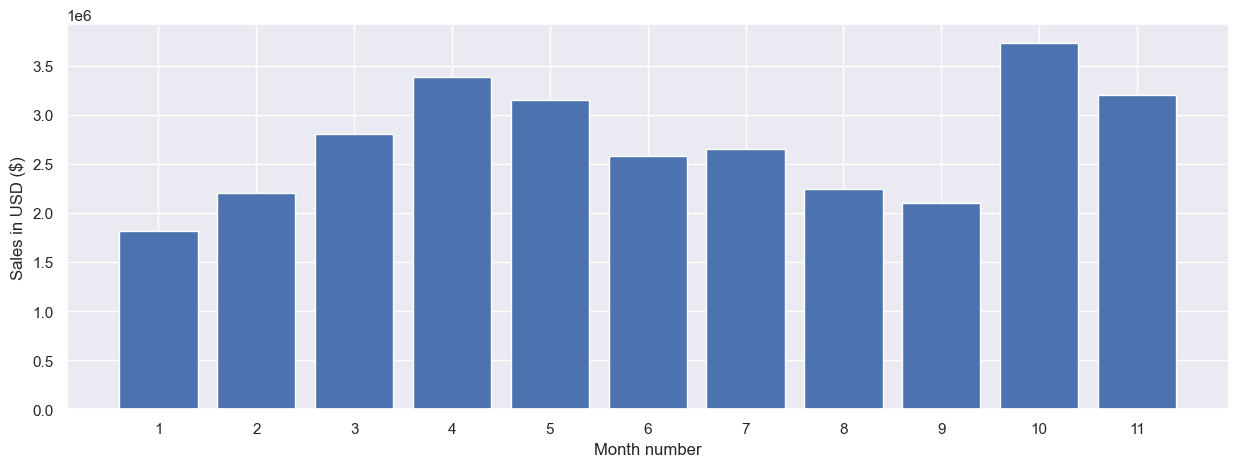

In [112]:
import matplotlib.pyplot as plt

months = range(1,12)
print(months)

plt.bar(months,sale)#all_data.groupby(['Month'])['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

<Axes: xlabel='Month', ylabel='Sales'>

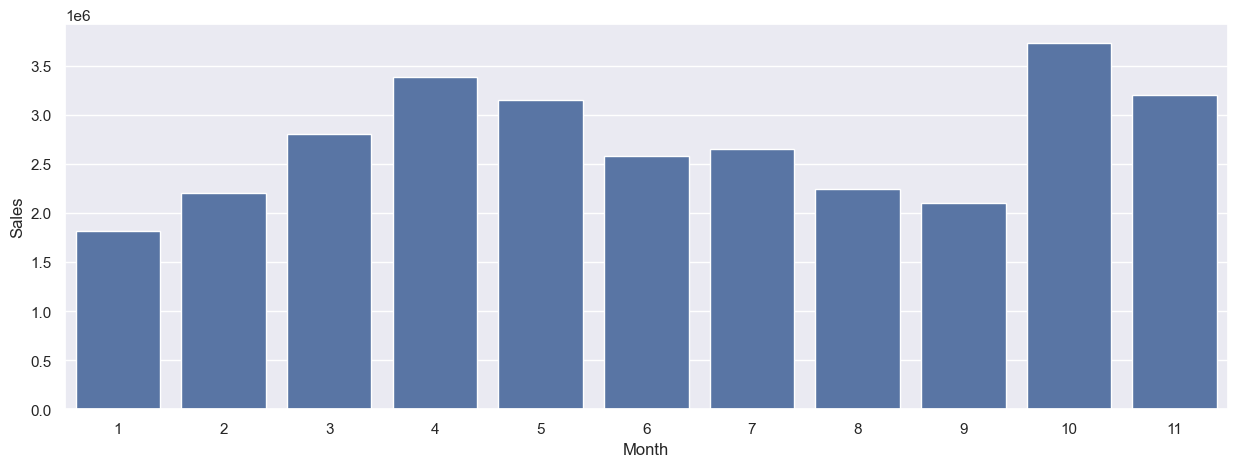

In [113]:
import seaborn as sns

total_sale = all_data.groupby('Month', as_index= False)['Sales'].sum().sort_values('Sales',ascending= False)

#sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= total_sale, x= 'Month', y= 'Sales')


# Question 1: What is the best month for sales? How much we earned that month?
## Answer: The best month for sale is October, In October we earned  3736726.88

# Question 2: What City sold the most product? 

In [114]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a City Column

In [115]:
# in Purchase Address we have a city, street etc
all_data['Purchase Address'].info()

<class 'pandas.core.series.Series'>
Index: 160932 entries, 0 to 161732
Series name: Purchase Address
Non-Null Count   Dtype 
--------------   ----- 
160932 non-null  object
dtypes: object(1)
memory usage: 2.5+ MB


In [116]:
def get_city(address):
    return address.split(',')[1].strip(' ') # or .str()
#here's no need to use strip function... but used to remove the leading&trailing space of City

def get_state(address):
#   return address.split(',')[2].split()     #or .split()
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)}    ({get_state(x)})')
all_data.head()
#now we successfully add city column

# understand the lambda function
#   print((lambda x,y: x+y) (4,5))

C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\2262145467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)}    ({get_state(x)})')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### another way to split the string but these bottom two cells  are not working properly

In [117]:
#split the string
#str.strip() used to remove leading&trailing spaces, str.upper(), str.lower(), str.len(), str.cat(), str.split(), str.replace()


#all_data[['Street','City1']]=all_data['Purchase Address'].str.split(',', n=1 ,expand = True)
#all_data.head()

In [118]:
#all_data.drop(columns=['Street'], inplace= True)
#all_data

#all_data[['City', 'State', 'postal_address']] = all_data['City1'].str.split('', n=2, expand = True) 
#all_data

In [119]:
#now the question is What City sold the most product?

total_product = all_data.groupby(['City'], as_index = False)['Product'].count()#.sort_values(by= 'Product',ascending=False)
total_product

,City,Product
0,Atlanta (GA),12892
1,Austin (TX),8555
2,Boston (MA),17235
3,Dallas (TX),12811
4,Los Angeles (CA),25705
5,New York City (NY),21464
6,Portland (ME),2140
7,Portland (OR),8676
8,San Francisco (CA),38701
9,Seattle (WA),12753


C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\2231523938.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  key.set_xticklabels(key.get_xticklabels(), rotation=90);


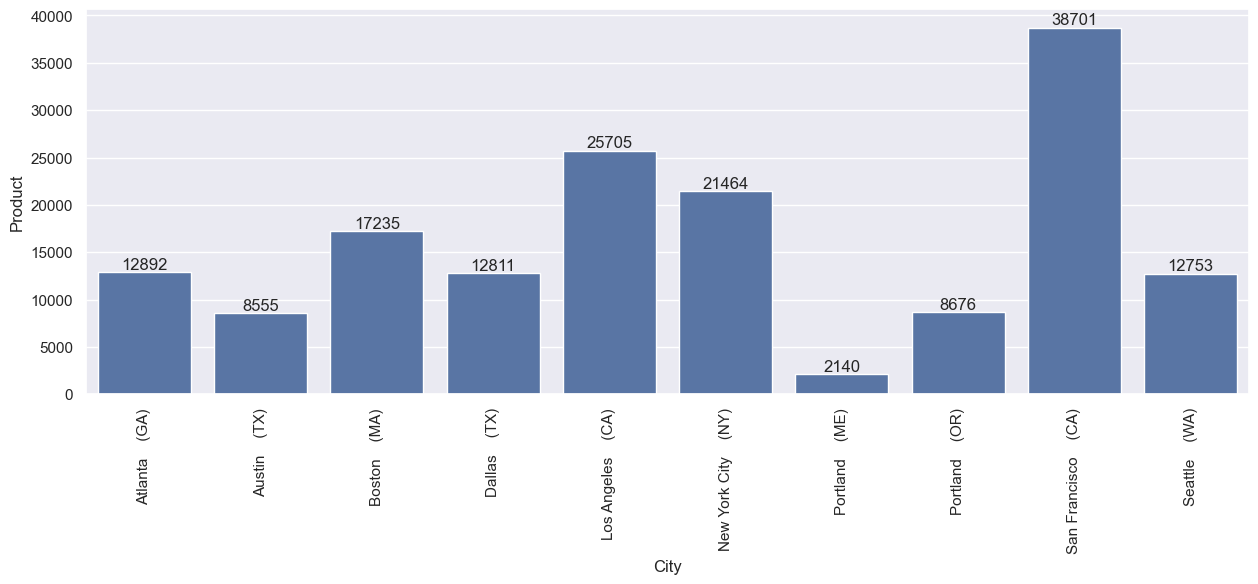

In [120]:
#sns.set(rc={'figure.figsize':(15,5)})

key=sns.barplot(data= total_product, x= 'City', y= 'Product')
key.set_xticklabels(key.get_xticklabels(), rotation=90);

for bars in key.containers:
    key.bar_label(bars)

In [121]:
'''
import matplotlib.pyplot as plt
keys = [city for city, df in all_data.groupby('City')]

plt.bar(keys,total_product)
plt.ylabel('Total_Products')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show() ''' 

#not working

"\nimport matplotlib.pyplot as plt\nkeys = [city for city, df in all_data.groupby('City')]\n\nplt.bar(keys,total_product)\nplt.ylabel('Total_Products')\nplt.xlabel('City')\nplt.xticks(keys, rotation='vertical', size=8)\nplt.show() "

C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\3484209384.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  key.set_xticklabels(key.get_xticklabels(), rotation=90);


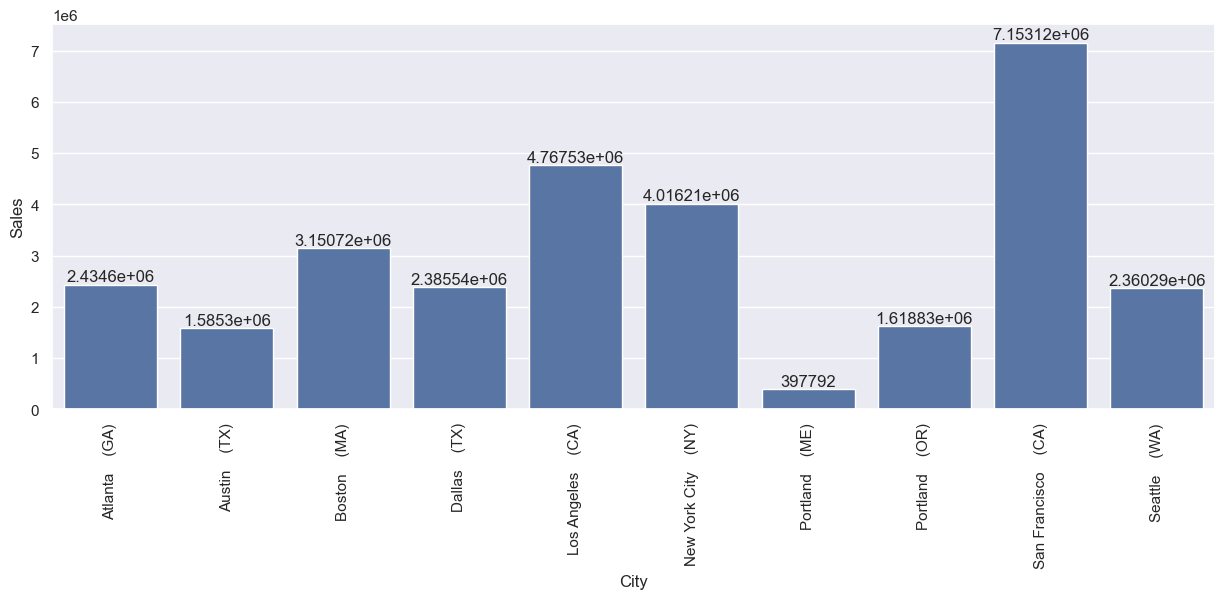

In [122]:
total_city_sale = all_data.groupby('City', as_index=False)['Sales'].sum()

key=sns.barplot(data= total_city_sale, x= 'City', y= 'Sales')
key.set_xticklabels(key.get_xticklabels(), rotation=90);

sns.set(rc={'figure.figsize':(10,7)})

for bars in key.containers:
    key.bar_label(bars)

# Question 2: What City sold the most product? 
### Answer: San Francisco (CA)  sold the most Products and their sale is 7.15312e+06 in the whole 11 months of 2019

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [123]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [124]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.sample()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160932 entries, 0 to 161732
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          160932 non-null  object        
 1   Product           160932 non-null  object        
 2   Quantity Ordered  160932 non-null  int32         
 3   Price Each        160932 non-null  float64       
 4   Order Date        160932 non-null  datetime64[ns]
 5   Purchase Address  160932 non-null  object        
 6   Month             160932 non-null  int32         
 7   Sales             160932 non-null  float64       
 8   City              160932 non-null  object        
 9   Hour              160932 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(4)
memory usage: 11.7+ MB


C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\4290006604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour


In [125]:
total_hours = all_data.groupby('Hour', as_index=False)['Quantity Ordered'].sum()
total_hours

,Hour,Quantity Ordered
0,0,3842
1,1,2238
2,2,1229
3,3,797
4,4,785
5,5,1276
6,6,2435
7,7,3862
8,8,6076
9,9,8576


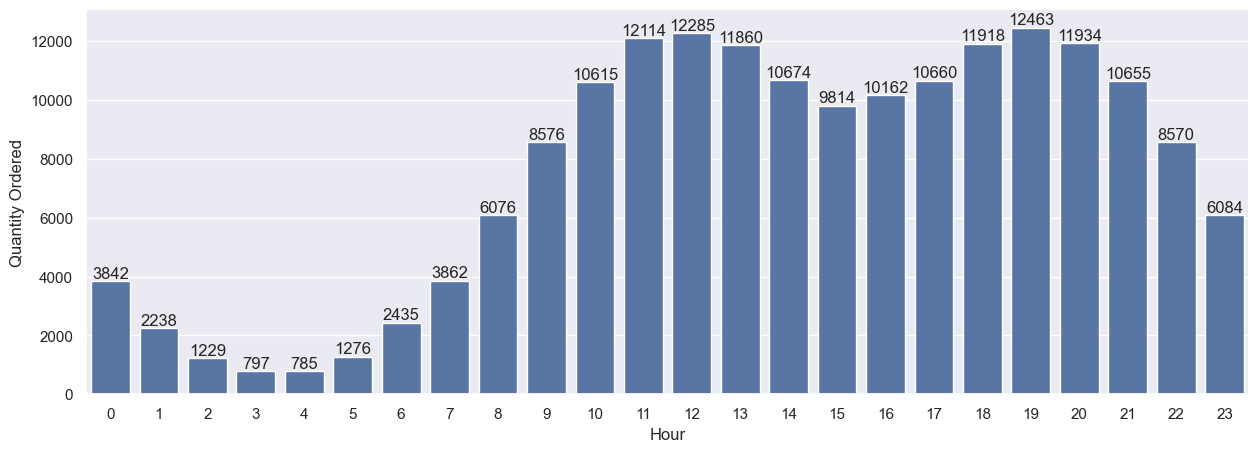

In [144]:
key = sns.barplot(data = total_hours, x= 'Hour', y= 'Quantity Ordered')

sns.set(rc={'figure.figsize':(10,5)})
for bars in key.containers:
    key.bar_label(bars)

In [127]:
# Add a Count column

all_data['Count'] = 1
all_data

# another way to add a column
#Count = 1   # ['a', 'b', 'c'] or more as you want
#all_data['Count7'] = Count
#all_data


C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\3713151518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Count'] = 1


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,1
...,...,...,...,...,...,...,...,...,...,...,...
161728,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,1
161729,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,1
161730,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,1
161731,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,1


In [128]:
total_hours_count = all_data.groupby('Hour', as_index=False)['Count'].count()  # .sum()
total_hours_count

,Hour,Count
0,0,3397
1,1,2022
2,2,1085
3,3,716
4,4,722
5,5,1130
6,6,2150
7,7,3426
8,8,5423
9,9,7621


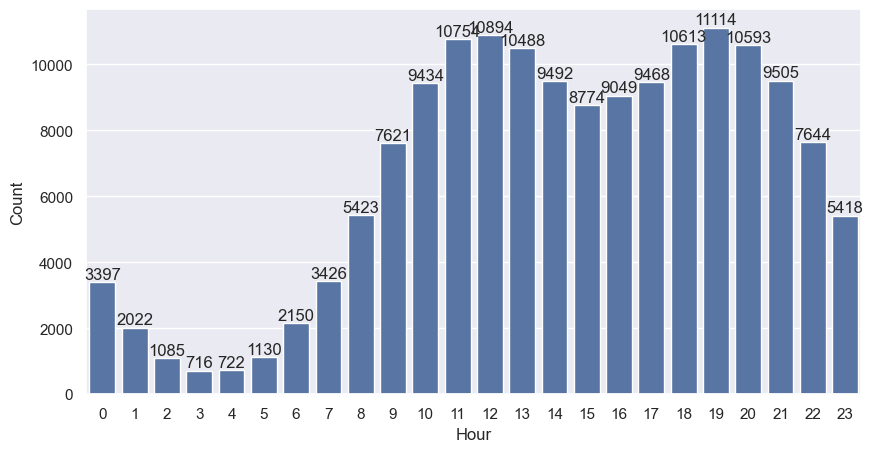

In [129]:
key = sns.barplot(data = total_hours_count, x= 'Hour', y='Count')

sns.set(rc={'figure.figsize':(15,5)})
for bars in key.containers:
    key.bar_label(bars) 

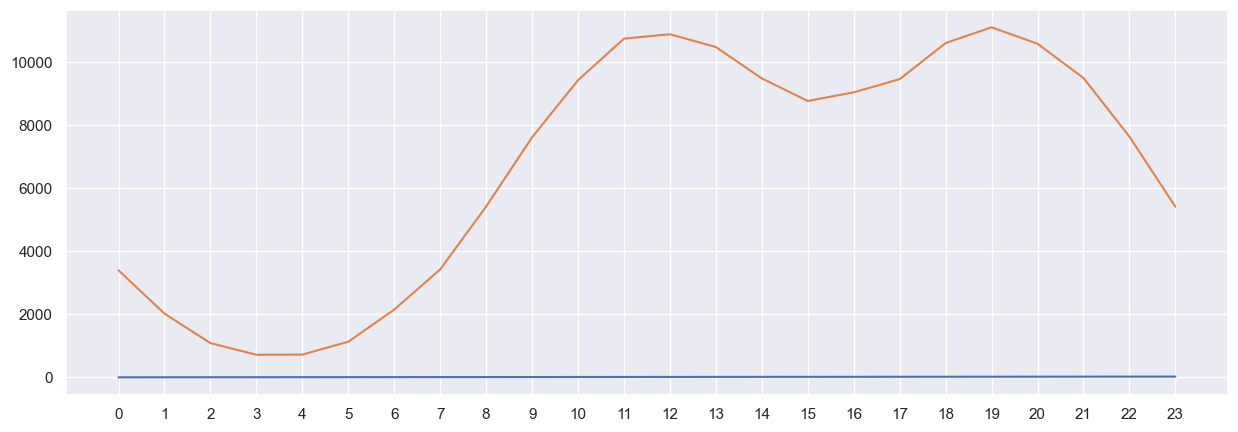

In [130]:
#keys = [pair for pair, df in all_data.groupby(['Hour'])]
keys = range(0,24)

plt.plot(keys, total_hours_count)
plt.xticks(keys)   # used to defined how many number or somthing what show on x-axis, as well as i define y-axis
plt.grid(color='white')           # without specify color grid doesn't show
plt.show()

#  Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
### Answer:  At 7pm(19)  Quantity Ordered is 12463 in which some orders (more than one) is occur on the same time & at the same place,.......it we exclude the same place at the same time and just consider these only (count=1)one time, Order quantity is 11114

## so the answer is that,
### At 7pm(19)  we should display advertisements to maximize likelihood of customer's buying product, after that 12am, 11am and so on...respectively is also best to maximize likehood of customer's buying product.

# Question 4: What product are most often sold together?

In [131]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,1


##### 1st method  to  .drop_duplicates() from Order ID&Grouped

In [132]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]


df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\458875769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
161664,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
161666,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
161674,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
161686,259314,"Wired Headphones,AAA Batteries (4-pack)"


#### 2nd method  to  .drop_duplicates() from Order ID&Group_Products

In [133]:
#all_data.groupby('Order ID')['Product'].sum().sample(50)           1,2 or more products attach with one Id

all_data[all_data['Order ID'].duplicated(keep=False)]   # to check duplicates Order IDs


all_data['Group_Products'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))     
#2 or more Products seperated by comma&space
#all_data

#drop_duplicates
all_data2 = all_data[['Order ID', 'Group_Products']].drop_duplicates()
all_data2


C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\2675111146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Group_Products'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Group_Products
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone, Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable
...,...,...
161728,259353,AAA Batteries (4-pack)
161729,259354,iPhone
161730,259355,iPhone
161731,259356,34in Ultrawide Monitor


##### Use   df2(DataFrame)   of   1st method,    
##### we don't want the one product our question is that what's products that most often sold together.  Therefore, we attach products into one column(Grouped) with comma(,) on the base/group of Order IDs. So we don't need the one product data/row....we use the df2(DataFrame) in which 2 or more products add in a single row.

In [134]:
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
161664,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
161666,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
161674,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
161686,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [135]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))    # put upto 5 from 1

for key,value in count.most_common(10):    #here you can specify how many rows you want show/get
    print(key, value)
    
# different IDs buy these products    

('iPhone', 'Lightning Charging Cable') 892
('Google Phone', 'USB-C Charging Cable') 869
('iPhone', 'Wired Headphones') 381
('Google Phone', 'Wired Headphones') 358
('iPhone', 'Apple Airpods Headphones') 308
('Vareebadd Phone', 'USB-C Charging Cable') 308
('Google Phone', 'Bose SoundSport Headphones') 193
('USB-C Charging Cable', 'Wired Headphones') 135
('Vareebadd Phone', 'Wired Headphones') 121
('Lightning Charging Cable', 'Wired Headphones') 81


In [136]:
def get_Products(product):
    return product.split(',')[0]
df2['Grouped'].apply(lambda x: f"{get_Products(x)}")

3                       Google Phone
18                      Google Phone
30        Bose SoundSport Headphones
32            AAA Batteries (4-pack)
119         Lightning Charging Cable
                     ...            
161664      Apple Airpods Headphones
161666                        iPhone
161674        34in Ultrawide Monitor
161686              Wired Headphones
161724                  Google Phone
Name: Grouped, Length: 6205, dtype: object

#### 

In [137]:
df2.groupby('Order ID')['Grouped'].count()

Order ID
141275    1
141290    1
141365    1
141384    1
141450    1
         ..
295487    1
295513    1
295526    1
295534    1
295599    1
Name: Grouped, Length: 6205, dtype: int64

# Question:4  What product are most often sold together?


## Answer: The most often sold product is that:     first ten
#### ('iPhone', 'Lightning Charging Cable') 892
#### ('Google Phone', 'USB-C Charging Cable') 869
#### ('iPhone', 'Wired Headphones') 381
#### ('Google Phone', 'Wired Headphones') 358
#### ('iPhone', 'Apple Airpods Headphones') 308
#### ('Vareebadd Phone', 'USB-C Charging Cable') 308
#### ('Google Phone', 'Bose SoundSport Headphones') 193
#### ('USB-C Charging Cable', 'Wired Headphones') 135
#### ('Vareebadd Phone', 'Wired Headphones') 121
#### ('Lightning Charging Cable', 'Wired Headphones') 81

# Question 5: What product sold the most? Why do you think it sold the most?

In [138]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count,Group_Products
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,1,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,1,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1,"Google Phone, Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,1,Wired Headphones


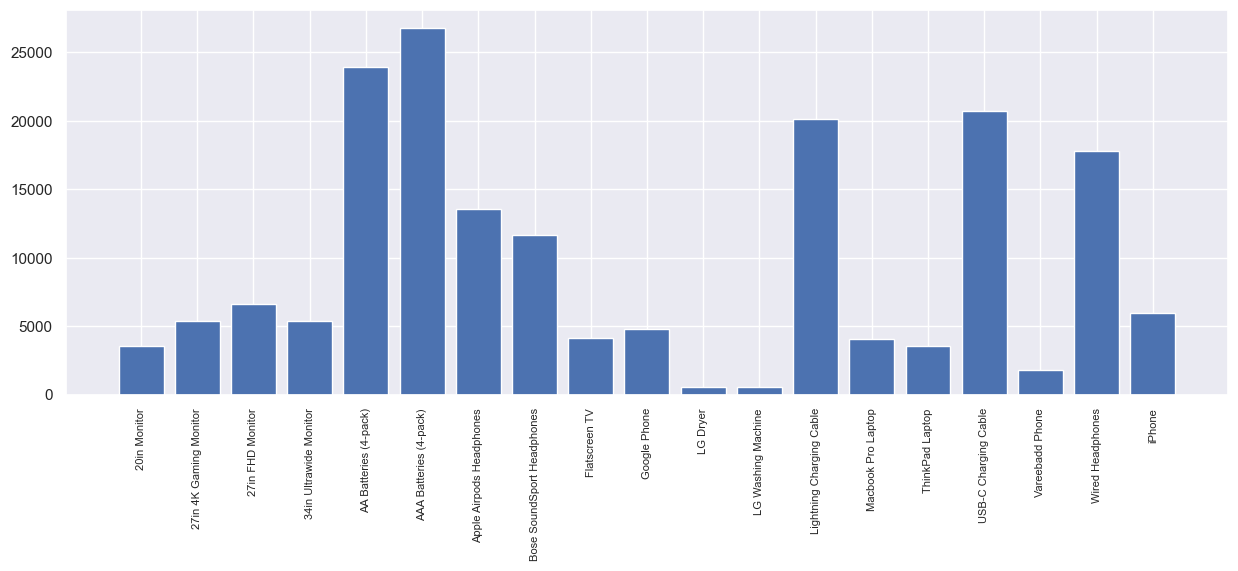

In [139]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


####  Product AAA Batteries (4-pack) has more orders.

In [140]:
all_data['Product'].nunique()

19

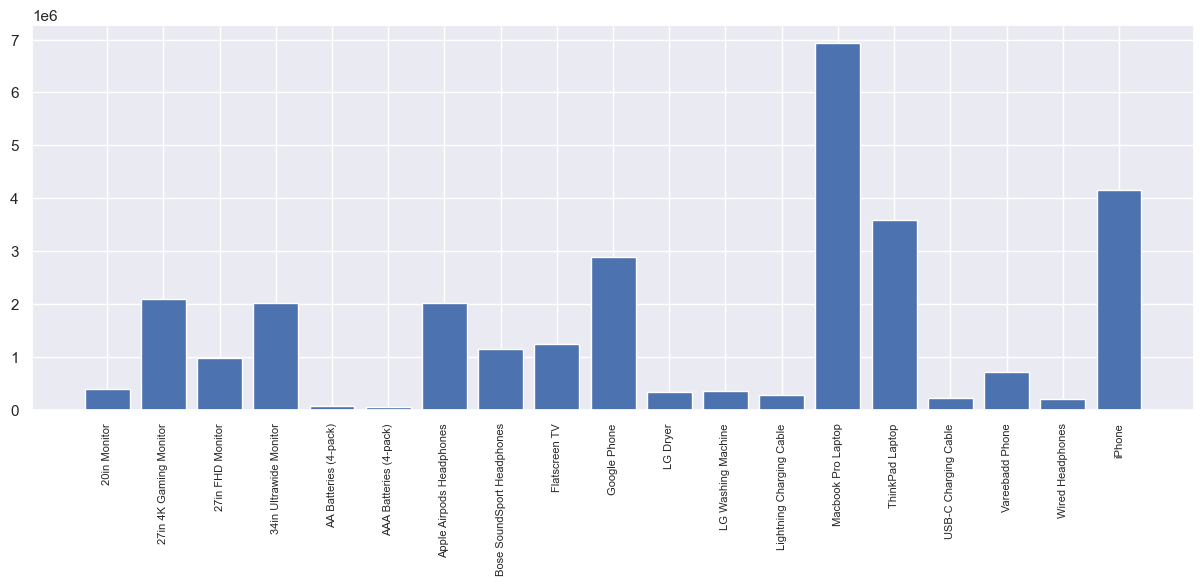

In [141]:
product_group = all_data.groupby('Product')
price_each= product_group['Price Each'].sum()

#product_group = all_data.groupby('Product')
#product_sale = product_group['Sales'].sum()

keys = [pair for pair, df in product_group]
plt.bar(keys, price_each)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [142]:
price_each.sort_values(ascending=False)

Product
Macbook Pro Laptop            6936000.00
iPhone                        4153800.00
ThinkPad Laptop               3586964.13
Google Phone                  2886000.00
27in 4K Gaming Monitor        2092686.34
34in Ultrawide Monitor        2027246.65
Apple Airpods Headphones      2023350.00
Flatscreen TV                 1240800.00
Bose SoundSport Headphones    1151384.85
27in FHD Monitor               981684.55
Vareebadd Phone                712000.00
20in Monitor                   388484.68
LG Washing Machine             351600.00
LG Dryer                       336000.00
Lightning Charging Cable       280462.00
USB-C Charging Cable           226082.05
Wired Headphones               195856.65
AA Batteries (4-pack)           68567.04
AAA Batteries (4-pack)          53242.93
Name: Price Each, dtype: float64

#### But the Macbook Pro Laptop has the highest price.

C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\660250949.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\PAK\AppData\Local\Temp\ipykernel_7976\660250949.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


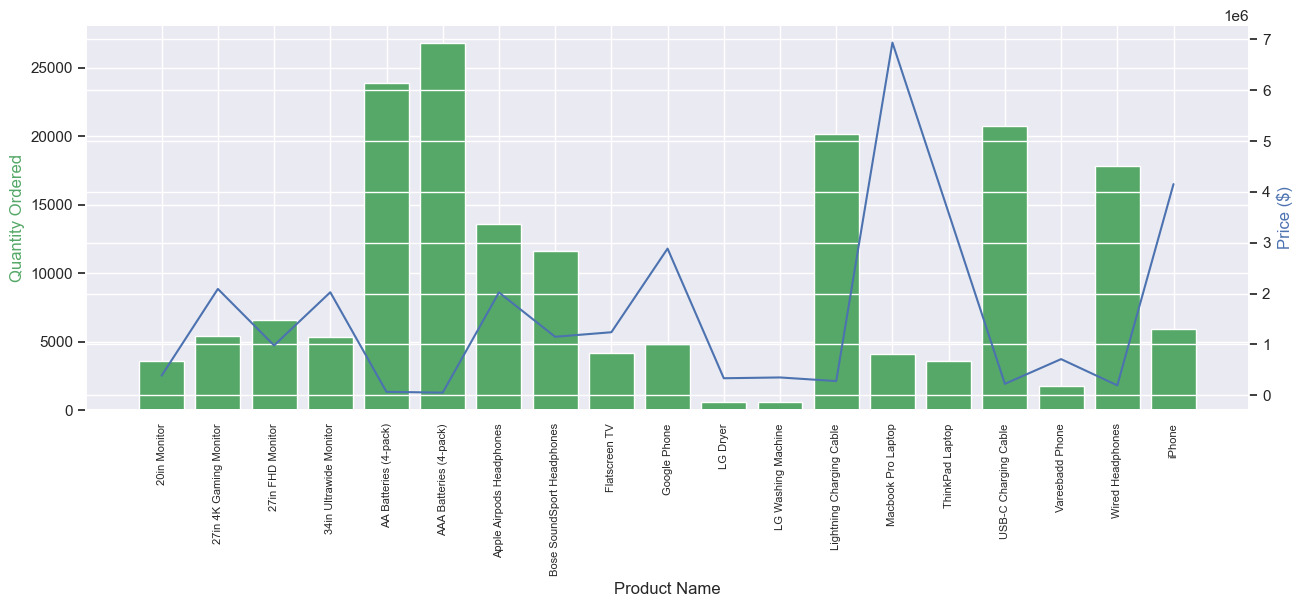

In [143]:

prices = all_data.groupby('Product')['Price Each'].sum()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

# Question:  What product sold the most? Why do you think it sold the most?

# Answer:
###  Product AAA Batteries (4-pack) has more orders. But the Macbook Pro Laptop has the highest price
## so the conclusion is that,  AAA Batteries (4-pack) product sold the most bcz it had more Quantity Orders.